## STATYSTYKA

In [1]:
# Normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# %matplotlib inline

In [2]:
mu = 0 # mean
var = 2 # variance 
sigma = np.sqrt(var) # standard dev
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)

In [3]:
x

array([-4.24264069, -4.15693077, -4.07122086, -3.98551095, -3.89980104,
       -3.81409112, -3.72838121, -3.6426713 , -3.55696138, -3.47125147,
       -3.38554156, -3.29983165, -3.21412173, -3.12841182, -3.04270191,
       -2.95699199, -2.87128208, -2.78557217, -2.69986226, -2.61415234,
       -2.52844243, -2.44273252, -2.3570226 , -2.27131269, -2.18560278,
       -2.09989287, -2.01418295, -1.92847304, -1.84276313, -1.75705321,
       -1.6713433 , -1.58563339, -1.49992348, -1.41421356, -1.32850365,
       -1.24279374, -1.15708382, -1.07137391, -0.985664  , -0.89995409,
       -0.81424417, -0.72853426, -0.64282435, -0.55711443, -0.47140452,
       -0.38569461, -0.2999847 , -0.21427478, -0.12856487, -0.04285496,
        0.04285496,  0.12856487,  0.21427478,  0.2999847 ,  0.38569461,
        0.47140452,  0.55711443,  0.64282435,  0.72853426,  0.81424417,
        0.89995409,  0.985664  ,  1.07137391,  1.15708382,  1.24279374,
        1.32850365,  1.41421356,  1.49992348,  1.58563339,  1.67

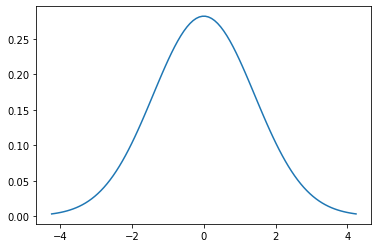

In [4]:
plt.plot(x, norm.pdf(x, mu, sigma))

In [5]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


## testowanie hipotez
wyrzucono 2 orły na 3 rzuty - czy moneta jest oszukana ?

### MODEL : Liczba wyrzuconych orłów spełnia rozkład Binomial 

Parametry modelu: N=3, P = liczba orłów na wszystkie rzuty = 2/3

Hipoteza zerowa : rozkład orłów wygląda tak: 


| 1  | 2  |  3 | liczba orłów    |
|---|---|---|-------|
|   |   |   | 0      |
| O |   |   | 1      |
|   | O |   | 1      |
|   |   | O | 1      |
| O | O |   | 2      |
| O |   |O  | 2      |
|   | O |O  | 2      |
| O | O |O  | 3      |


$P(x=0)=\frac{1}{8}$

$P(x=1)=\frac{3}{8}$

$P(x=2)=\frac{3}{8}$

$P(x=3)=\frac{1}{8}$


Text(0.5, 0, 'Rozkład ilości orłów dla trzech rzutów monetą gdy prawdziwa jest hipoteza zerowa')

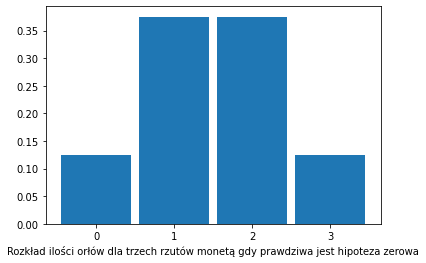

In [6]:
plt.bar([0, 1, 2, 3], [1/8, 3/8, 3/8, 1/8], width=0.9)
_ = plt.xticks([0, 1, 2, 3], [0, 1, 2, 3])
plt.xlabel("Rozkład ilości orłów dla trzech rzutów monetą gdy prawdziwa jest hipoteza zerowa")

###  Oblicz prawdopodobieństwo p-value zaobserwowania wartości równej bądź większej 2 przy założeniu Hipotezy Zerowej. 


$$ P(x>2|H_0) = P(x=2) + P(x=3) = \frac{3}{8}+\frac{1}{8} = \frac{4}{8}=\frac{1}{2}$$

>>> Zad 0. w 30 rzutach wypadło 24 orły. Zweryfikuj czy moneta jest prawidłowa. 

## One sample t-test

The one-sample t-test is used to determine whether a sample comes from a population with a specific mean.

Przykład:

Chcemy przetestować czy średni wzrost populacji to 175 cm.

1. Zakładamy, że wzrost reprezentowany jest przez rozkład normalny $X = \mathcal{N}(\mu,\sigma)$ 
tzn: $\text{wzrost}_i = \text{średni_wzrost_populacji} + \text{błąd}_i$

błędy $\epsilon_i$ nazywamy resztami

2. FIT czyli estymacja parametrów modelu $\vec{x},s_x$ jako estymatory $\mu, \sigma$

3. Obliczenie statystyki testowej. W naszym przypadku to statystyka t-studenta

4. Oblicz p-value - prawd. pojawienia się wyniku gdy $H_0$ jest prawdziwa. 

In [7]:
import numpy as np
x = [183,  183,  173,  182,  183,  173,  199,  185,  168,  187]
xbar = np.mean(x) # sample mean
mu0 = 175 # hypothesized value
s = np.std(x, ddof=1) # sample standard deviation
n = len(x) # sample size
print(xbar)
tobs = (xbar - mu0) / (s / np.sqrt(n))
print(tobs)

181.6
2.396876631158585


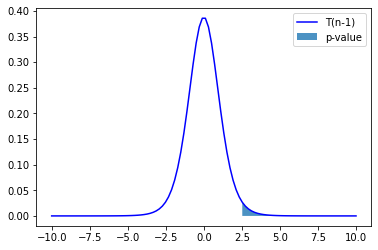

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt
#tobs = 2.39687663116 # assume the t-value
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tobs]

plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value") 
plt.legend()

>>> Zad.1 Znajdź test t studenta w pakiecie stats i określ wynik za pomocą p-value.

In [9]:
import scipy.stats as stats
height = np.array([ 183, 183, 173, 182, 183, 173, 199, 185, 168, 187,
                    166,  171,  173,  164,  170,  160,  179,  173,  162,  177])
grp = np.array(["M"] * 10 + ["F"] * 10)

>>> Zad.2 Umieść powyższe dane do pd.DataFrame()

In [10]:
# Compute with scipy
print(stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True))

Ttest_indResult(statistic=3.551151988846681, pvalue=0.0022820893711272506)


In [11]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


In [12]:
# Wilcoxon
print(stats.mannwhitneyu(height[grp == "M"], height[grp == "F"]))

MannwhitneyuResult(statistic=12.0, pvalue=0.0021875287667946952)


<img src="rys1.png">

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
# Dataset:
# 15 samples:
# 10 first exposed
exposed = np.array([1] * 10 + [0] * 10)
# 8 first with cancer, 10 without, the last two with.
cancer = np.array([1] * 8 + [0] * 10 + [1] * 2)

In [14]:
exposed

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
cancer

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [16]:
crosstab = pd.crosstab(exposed, cancer, rownames=['exposed'],
                       colnames=['cancer'])

In [17]:
crosstab

cancer,0,1
exposed,,
0,8,2
1,2,8


In [18]:
chi2, pval, dof, expected = stats.chi2_contingency(crosstab)

In [19]:
print(f"chi2: {chi2}\n pval: {pval},\n dof:{dof},\n expected: {expected}")

chi2: 5.0
 pval: 0.025347318677468325,
 dof:1,
 expected: [[5. 5.]
 [5. 5.]]


In [20]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


In [21]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution
